In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)

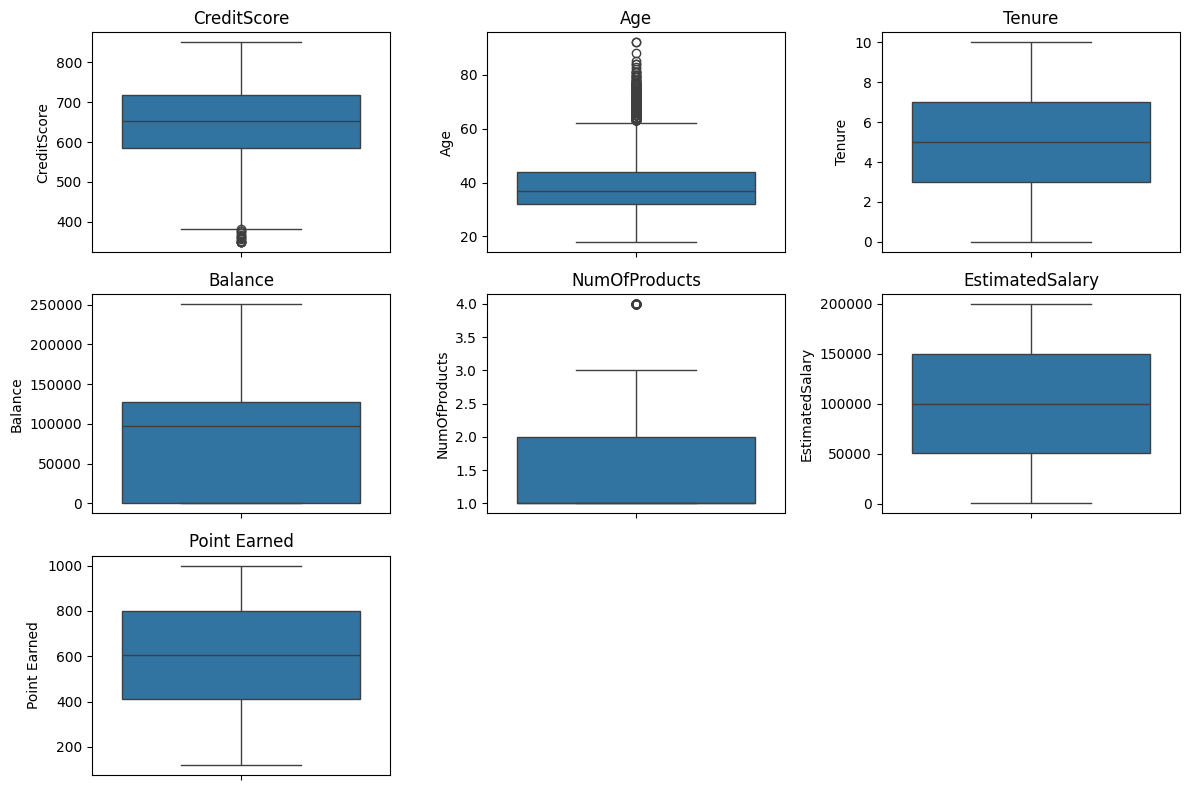

In [5]:
num_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
def remove_outliers(data, cols):
    cleaned_data = data.copy()
    for col in cols:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    return cleaned_data
df_clean = remove_outliers(df, num_cols)

Accuracy with outliers:


In [8]:
def prepare_data(data):
    X = data[num_cols]
    y = data['Exited']
    return train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = prepare_data(df)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = prepare_data(df_clean)

In [9]:
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [10]:
svm = SVC()
rf = RandomForestClassifier()
acc_svm = train_evaluate_model(svm, X_train, X_test, y_train, y_test)
acc_rf = train_evaluate_model(rf, X_train, X_test, y_train, y_test)
acc_svm_clean = train_evaluate_model(svm, X_train_clean, X_test_clean, y_train_clean, y_test_clean)
acc_rf_clean = train_evaluate_model(rf, X_train_clean, X_test_clean, y_train_clean, y_test_clean)


In [11]:
print("Accuracy with outliers:")
print(f"SVM: {acc_svm:.4f}, Random Forest: {acc_rf:.4f}")
print("\nAccuracy after removing outliers:")
print(f"SVM: {acc_svm_clean:.4f}, Random Forest: {acc_rf_clean:.4f}")

Accuracy with outliers:
SVM: 0.8035, Random Forest: 0.8425

Accuracy after removing outliers:
SVM: 0.7957, Random Forest: 0.8438
